In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import signal
import scipy.io
from pyeeg_r2 import *
from sklearn.decomposition import FastICA, PCA

#bandpass 1-50Hz notch 60Hz (filter)

#mat = scipy.io.loadmat('C:\\Users\\roris\\Documents\\mirai\\aura\\dataset\\eeglab_data.set')
#sleepy = pd.read_csv('C:\\cygwin64\\home\\roris\\sampless.csv')
#real_sleepy = pd.read_csv('C:\\cygwin64\\home\\roris\\samples.csv')

data_raw = pd.read_csv('C:\\Users\\roris\\Documents\\Aura EEG Records\\2018-09-10\\2018-09-10___11;44;07\\AURA_RAW___2018-09-10___11;44;07.csv')
open_bci_data = pd.read_csv('C:\\Users\\roris\\Desktop\\OpenBCI_meditation.csv')
#data_raw = pd.read_csv('C:\\Users\\roris\\Documents\\Aura EEG Records\experiment\\2018-07-04___10;45;43\\AURA_RAW___2018-07-04___10;45;43.csv')
data_filtered = pd.read_csv('C:\\Users\\roris\\Documents\\Aura EEG Records\\experiment\\2018-07-04___10;45;43\\AURA_Filtered___2018-07-04___10;45;43.csv')
#Fz - Cz (references for middle and back respectively)

# a1 = data_raw["\"A1\""]
# a2 = data_raw["\"A2\""]
# p3 = data_raw["\"P3\""]
# pz = data_raw["\"Pz\""]
# fz = data_raw["\"Fz\""]

#data_raw AURA
# a1 = data_raw['\"A1\"']
# a2 = data_raw['\"A2\"']
o1 = data_raw['\'O1\'']
o2 = data_raw['\'O2\'']
p7 = data_raw['\'P7\'']
fz = data_raw['\'Fz\'']
p4 = data_raw['\'P4\'']
p3 = data_raw['\'P3\'']
pz = data_raw['\'Pz\'']
cz = data_raw['\'Cz\'']

#data_filtered AURA
# a1_aura_f = data_filtered["\"A1\""]

#open_bci data
# o1 = open_bci_data['\'O1\'']
# o2 = open_bci_data['\'O2\'']
# p7 = open_bci_data['\'P7\'']
# fz = open_bci_data['\'Fz\'']
# p4 = open_bci_data['\'P4\'']
# p3 = open_bci_data['\'P3\'']
# pz = open_bci_data['\'Pz\'']
# cz = open_bci_data['\'Cz\'']

total = len(fz)

# plt.plot(range(total), o2)

#CAR filter
# car_o1 = 0
# car_o2 = 0
# car_p7 = 0
# car_fz = 0
# car_p4 = 0
# car_p3 = 0
# car_pz = 0
# car_cz = 0
# car_total = 0
# car = o2 + p7 + fz + p4 + p3 + pz + cz
# car = a2 + p3 + pz + fz
ave = 0

# X = np.array([o1, o2, p7, fz, p4, p3, pz, cz])

# car_pz = -(car_total)/8
# ave = car_pz
# for i in car:
#     ave = ave + i
# ave = ave / 7
# ave = ave / 4
print(ave)

#back clean
#o1 = o1 - pz
#o2 = o2 - pz
#p7 = p7 - pz

#central clean
#fz = fz - cz
#p4 = p4 - pz
#p3 = p3 - pz

# o1 = o1 - ave
# o2 = o2 - ave
# # a1 = a1 - ave
# # a2 = a2 - ave
# p7 = p7 - ave
# fz = fz - ave
# p4 = p4 - ave
# p3 = p3 - ave
# pz = pz - ave
# cz = cz - ave

#get smaller values
# o1 = o1 / 1000000000
# o2 = o2 / 1000000000
# p7 = p7 / 1000000000
# fz = fz / 1000000000
# p4 = p4 / 1000000000
# p3 = p3 / 1000000000
# pz = pz / 1000000000
# cz = cz / 1000000000

#cleaner = (a1 + a2) / 2

#p3 = p3 - cleaner
#pz = pz - cleaner
#fz = fz - cleaner

#AURA frequency
fs = 250

0


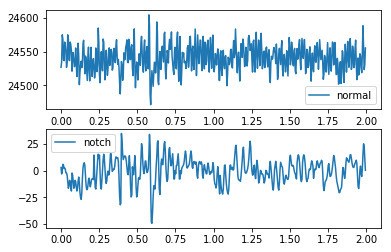

In [3]:
T = 2
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
plt.subplot(2,1,1)
plt.plot(t, a1[0:500], label='normal')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, a1_aura_f[0:500], label='notch')
plt.legend()

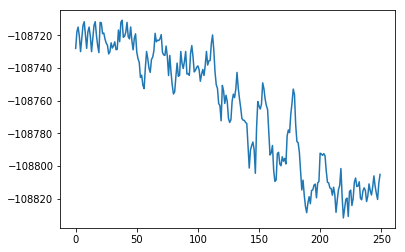

In [4]:
#print(type(mat['EEG'][0][0][9][0])) ->numpy array
#print(mat) #-> all 32 arrays of 30504 values in them
#sleepy_pz = sleepy['\'Pz..\'']
#sleepy_p3 = sleepy['\'P3..\'']
#sleepy_fz = sleepy['\'Fz..\'']
#realEEG = mat['EEG'][0][0][9][0].tolist()
#sl_fpz = real_sleepy['\'EEG Fpz-Cz\'']
#sl_pz = real_sleepy['\'EEG Pz-Oz\'']
# plt.plot(range(25000), o1[0:25000])
plt.plot(range(250), o1[0:250])

In [5]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    #b, a = signal.butter(order, 0.5, btype='lowpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    #y = signal.lfilter(b, a, data)
    y = signal.filtfilt(b, a, data)
    return y

def arithSeq(first, n, dif):
    return first + (n - 1)*dif

def car(o1,o2,p4,pz,p3,p7,cz,fz,current):
    car_current = []
    for i in range(len(o1)):
        E = float(o1[i])+float(o2[i])+float(p4[i])+float(pz[i])+float(p3[i])+float(p7[i])+float(cz[i])+float(fz[i])
        car_current.append(float(current[i])-(E/7))
    return car_current

In [6]:
# car_o1 = car(o1,o2,p4,pz,p3,p7,cz,fz,o1)
# car_o1 = car(o1,o2,p4,pz,p3,p7,cz,fz,o1)
# car_o2 = car(o1,o2,p4,pz,p3,p7,cz,fz,o2)
# car_p4 = car(o1,o2,p4,pz,p3,p7,cz,fz,p4)
# car_pz = car(o1,o2,p4,pz,p3,p7,cz,fz,pz)
# car_p3 = car(o1,o2,p4,pz,p3,p7,cz,fz,p3)
# car_p7 = car(o1,o2,p4,pz,p3,p7,cz,fz,p7)
# car_cz = car(o1,o2,p4,pz,p3,p7,cz,fz,cz)
# car_fz = car(o1,o2,p4,pz,p3,p7,cz,fz,fz)

In [7]:
# plt.plot(range(total), car_pz)

In [8]:
f0 = 60.0 #frequency to remove from signal
Q = 30.0  #quality factor
w0 = f0/(fs/2) #normalized frequency
b, a = signal.iirnotch(w0, Q)
w, h = signal.freqs(b, a)
freq = w*fs/(2*np.pi)

In [9]:
o1_f = signal.filtfilt(b, a, o1)
o2_f = signal.filtfilt(b, a, o2)
p7_f = signal.filtfilt(b, a, p7)

# a1_f = signal.filtfilt(b, a, a1)
# a2_f = signal.filtfilt(b, a, a2)

cz_f = signal.filtfilt(b, a, cz)
pz_f = signal.filtfilt(b, a, pz)

fz_f = signal.filtfilt(b, a, fz)
p4_f = signal.filtfilt(b, a, p4)
p3_f = signal.filtfilt(b, a, p3)

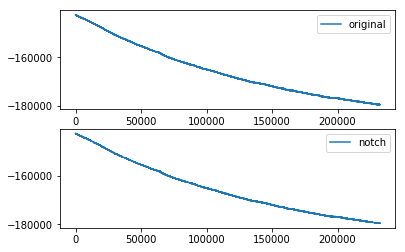

In [10]:
plt.subplot(2,1,1)
plt.plot(range(total), o2, label='original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(range(total), o2_f, label='notch')
plt.legend()

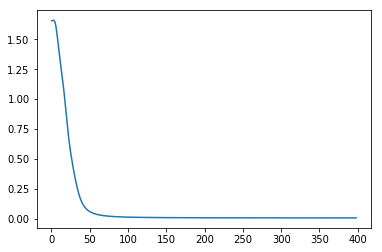

In [11]:
b, a = butter_bandpass(1, 50, fs, order=6)
w, h = signal.freqs(b, a)
freq = w*fs/(2*np.pi)
plt.plot(freq, abs(h))

In [12]:
#second order passband filter 1-50 Hz
o1_filtered = butter_bandpass_filter(o1_f, 1, 50, fs, order=6)
o2_filtered = butter_bandpass_filter(o2_f, 1, 50, fs, order=6)
p7_filtered = butter_bandpass_filter(p7_f, 1, 50, fs, order=6)

# a1_filtered = butter_bandpass_filter(a1_f, 1, 50, fs, order=6)
# a2_filtered = butter_bandpass_filter(a2_f, 1, 50, fs, order=6)

cz_filtered = butter_bandpass_filter(cz_f, 1, 50, fs, order=6)
pz_filtered = butter_bandpass_filter(pz_f, 1, 50, fs, order=6)

fz_filtered = butter_bandpass_filter(fz_f, 1, 50, fs, order=6)
p4_filtered = butter_bandpass_filter(p4_f, 1, 50, fs, order=6)
p3_filtered = butter_bandpass_filter(p3_f, 1, 50, fs, order=6)

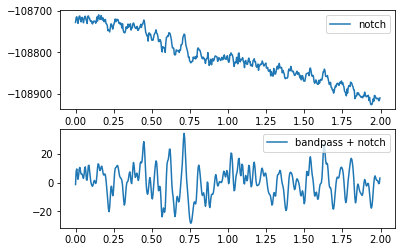

In [13]:
T = 2
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
plt.subplot(2,1,1)
plt.plot(t, o1_f[0:500], label='notch')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, o1_filtered[0:500], label='bandpass + notch')
plt.legend()

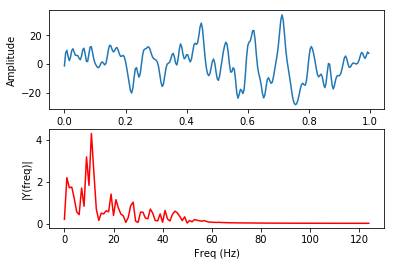

In [14]:
def plotSpectrum(y,Fs):
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n//2)]
 
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')

Fs = 250.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector


plt.subplot(2,1,1)
plt.plot(t,o1_filtered[0:250])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2,1,2)
plotSpectrum(o1_filtered[0:250],Fs)
plt.show()

In [15]:
#FFT data preparation
bands = [0.5,3.5,7.5,13,30] #delta, theta, alpha and beta respectively
"""engagementp3 = []
engagementpz = []
engagementfz = []

mean = sum(p3_f.tolist()) / len(p3_f)
p3_smooth = p3_f - mean

mean = sum(rp3_f.tolist()) / len(rp3_f)
rp3_smooth = rp3_f - mean

mean = sum(sleepy_p3.tolist()) / len(sleepy_p3)
sleepy_p3_smooth = sleepy_p3 - mean

mean = sum(sleepy_pz.tolist()) / len(sleepy_pz)
sleepy_pz_smooth = sleepy_pz - mean

mean = sum(sleepy_fz.tolist()) / len(sleepy_fz)
sleepy_fz_smooth = sleepy_fz - mean

mean = sum(sl_fpz.tolist()) / len(sl_fpz)
sl_fpz_smooth = sl_fpz - mean

mean = sum(sl_pz.tolist()) / len(sl_pz)
sl_pz_smooth = sl_pz - mean

real_engagement = []

real_engagement1 = []
real_engagement2 = []
real_engagement3 = []

s_engagement1 = []
s_engagement2 = []

engagementp3_f = []"""

engagement_o1 = []
engagement_o2 = []
engagement_p7 = []

engagement_cz = []
engagement_pz = []

engagement_fz = []
engagement_p4 = []
engagement_p3 = []

o1_smooth = o1_filtered
o2_smooth = o2_filtered
p7_smooth = p7_filtered

cz_smooth = cz_filtered
pz_smooth = pz_filtered

fz_smooth = fz_filtered
p4_smooth = p4_filtered
p3_smooth = p3_filtered

Text(0.5,1,'Band Powers')

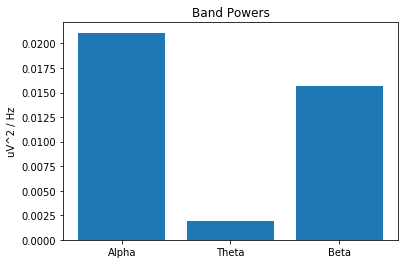

In [16]:
power, power_ratio = bin_power(o1_smooth[500:750], bands, fs)
beta = (power_ratio[3] ** 2) / 17
alpha = (power_ratio[2] ** 2) / 5.5
theta = (power_ratio[1] ** 2) / 4

powers = (alpha, theta, beta)

objects = ('Alpha', 'Theta', 'Beta')
y_pos = np.arange(len(objects))

plt.bar(y_pos, powers, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('uV^2 / Hz')
plt.title('Band Powers')

In [17]:
#power, power_ratio = bin_power(p3[250:500].values.tolist(), bands, fs)
#CAR filter to bands values
#average of whole band given time
#substract eyesopen and eyesclosed
Nfft = 250
for i in range(0, total-Nfft):
    if (i+1) * Nfft >= total:
        break
    
#     i:Nfft+i
    #FFT calculation and band separation
    power_o1, power_ratio_o1 = bin_power(o1_smooth[i:Nfft*(i+1)], bands, fs)
    power_o2, power_ratio_o2 = bin_power(o2_smooth[i:Nfft*(i+1)], bands, fs)
    power_p7, power_ratio_p7 = bin_power(p7_smooth[i:Nfft*(i+1)], bands, fs)
    
    power_cz, power_ratio_cz = bin_power(cz_smooth[i:Nfft*(i+1)], bands, fs)
    power_pz, power_ratio_pz = bin_power(pz_smooth[i:Nfft*(i+1)], bands, fs)
    
    power_fz, power_ratio_fz = bin_power(fz_smooth[i:Nfft*(i+1)], bands, fs)
    power_p4, power_ratio_p4 = bin_power(p4_smooth[i:Nfft*(i+1)], bands, fs)
    power_p3, power_ratio_p3 = bin_power(p3_smooth[i:Nfft*(i+1)], bands, fs)
    
    #o1
    beta = (power_ratio_o1[3] ** 2) / 17
    alpha = (power_ratio_o1[2] ** 2) / 5.5
    theta = (power_ratio_o1[1] ** 2) / 4
    #beta = power_o1[3]
    #alpha = power_o1[2]
    #theta = power_o1[1]
    engagement_o1.append(beta / (alpha + theta))
    
    #o2
    beta = (power_ratio_o2[3] ** 2) / 17
    alpha = (power_ratio_o2[2] ** 2) / 5.5
    theta = (power_ratio_o2[1] ** 2) / 4
    #beta = power_o2[3]
    #alpha = power_o2[2]
    #theta = power_o2[1]
    engagement_o2.append(beta / (alpha + theta))
    
    #p7
    beta = (power_ratio_p7[3] ** 2) / 17
    alpha = (power_ratio_p7[2] ** 2) / 5.5
    theta = (power_ratio_p7[1] ** 2) / 4
    #beta = power_p7[3]
    #alpha = power_p7[2]
    #theta = power_p7[1]
    engagement_p7.append(beta / (alpha + theta))
    
    cz
    beta = (power_ratio_cz[3] ** 2) / 17
    alpha = (power_ratio_cz[2] ** 2) / 5.5
    theta = (power_ratio_cz[1] ** 2) / 4
    #beta = power_cz[3]
    #alpha = power_cz[2]
    #theta = power_cz[1]
    engagement_cz.append(beta / (alpha + theta))
    
    #pz
    beta = (power_ratio_pz[3] ** 2) / 17
    alpha = (power_ratio_pz[2] ** 2) / 5.5
    theta = (power_ratio_pz[1] ** 2) / 4
    #beta = power_pz[3]
    #alpha = power_pz[2]
    #theta = power_pz[1]
    engagement_pz.append(beta / (alpha + theta))
    
    #fz
    beta = (power_ratio_fz[3] ** 2) / 17
    alpha = (power_ratio_fz[2] ** 2) / 5.5
    theta = (power_ratio_fz[1] ** 2) / 4
    #beta = power_fz[3]
    #alpha = power_fz[2]
    #theta = power_fz[1]
    engagement_fz.append(beta / (alpha + theta))
    
    #p4
    beta = (power_ratio_p4[3] ** 2) / 17
    alpha = (power_ratio_p4[2] ** 2) / 5.5
    theta = (power_ratio_p4[1] ** 2) / 4
    #beta = power_p4[3]
    #alpha = power_p4[2]
    #theta = power_p4[1]
    engagement_p4.append(beta / (alpha + theta))
    
    #p3
    beta = (power_ratio_p3[3] ** 2) / 17
    alpha = (power_ratio_p3[2] ** 2) / 5.5
    theta = (power_ratio_p3[1] ** 2) / 4
    #beta = power_p3[3]
    #alpha = power_p3[2]
    #theta = power_p3[1]
    engagement_p3.append(beta / (alpha + theta))

36250
929


(0, 1)

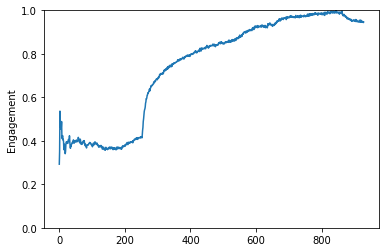

In [40]:
T = 145
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
engagement_o1 = engagement_o1 / np.amax(engagement_o1)
engagement_o2 = engagement_o2 / np.amax(engagement_o2)
engagement_fz = engagement_fz / np.amax(engagement_fz)
engagement_pz = engagement_pz / np.amax(engagement_pz)
engagement_p3 = engagement_p3 / np.amax(engagement_p3)
engagement_p4 = engagement_p4 / np.amax(engagement_p4)
engagement_cz = engagement_cz / np.amax(engagement_cz)
engagement_p7 = engagement_p7 / np.amax(engagement_p7)
print(len(t))

limit = 250

eyes_avg = 0

#y = signal.savgol_filter(engagement5, 7, 3)
print(len(engagement_p3))
#engCounter = [i for i in range(len(engagement1))]
#eyesclosed = [i for i in range(600)]
#eyesopen = [i for i in range(180)]
#counter = [i for i in range(120)]


plt.plot(range(929), engagement_o2)

plt.ylabel('Engagement')
plt.ylim(0, 1)

In [19]:
# import csv
# #eyesclosed = [i for i in range(600)]
# counter = [i for i in range(len(engagement_o1))]

# np.savetxt("natalia.csv", np.column_stack((counter, engagement_o1)), delimiter=",", fmt='%s')